# DoE | Análise de Resultados de Experimentos Fatoriais com Python

Nesta atividade, vamos analisar resultados de experimentos fatoriais. Iniciaremos por uma análise mais simples e manuale e avançaremos com o uso da ANOVA.

Vamos utilizar o dataset adaptado CAKE [cake.csv](https://drive.google.com/file/d/1rKsiVTj82Mtr_Mi_SPXwXFr71d32C3HV/view?usp=drive_link).

# Atividade 0 - Baixe e Importe o Dataset
Importe o arquivo como dataframe do Pandas

In [1]:
# External dependencies
import pandas as pd
import seaborn as sns

In [75]:
# Omitt warnings
import warnings
warnings.filterwarnings('ignore')

In [8]:
# Import dataset
df_original = pd.read_csv('2.5_dataset_cake.csv')
df_original.head(10)

,FLOUR,EGGS,TASTE
0,-1,-1,3.625
1,-1,-1,2.600
2,-1,1,5.250
3,-1,1,4.700
4,1,-1,3.775
5,1,-1,3.475
6,1,1,5.650
7,1,1,4.950


In [3]:
# Check dataset
print(df_original.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FLOUR   8 non-null      int64  
 1   EGGS    8 non-null      int64  
 2   TASTE   8 non-null      float64
dtypes: float64(1), int64(2)
memory usage: 324.0 bytes
None


In [4]:
# duplicate dataset
df = df_original.copy()

# Atividade 1 (Opcional) - Plote os experimentos presentes na Tabela
Sugestão: utilize a ferramenta `PairGrid` do Seaborn

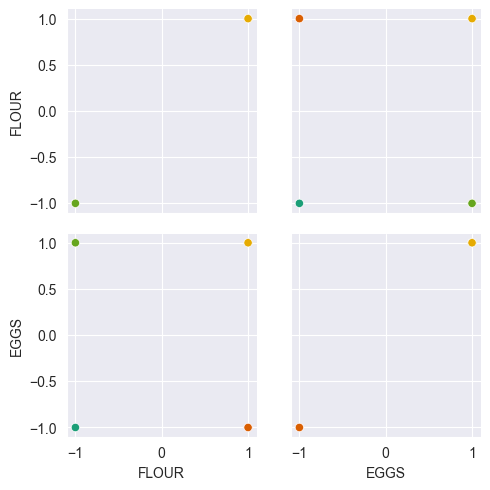

In [27]:
# Generate a Seaborn PairGrid with the datapoints scatter plotted
grid = sns.PairGrid(df, vars=df[df.columns[:-1]], hue='TASTE', palette='Dark2')
grid.map(sns.scatterplot);

# Atividade 2 - Divida o dataframe e calcule os efeitos do primeiro fator

In [15]:
# List of factors
print('Fatores: ', df.columns.values)

Fatores:  ['FLOUR' 'EGGS' 'TASTE']


In [38]:
# Filter 'EGGS' column: EGGS == 1 --> A
df_eggs_a = df[df['EGGS'] == 1]
eggs_a = df_eggs_a['TASTE'].mean()
print('Eggs A - Mean taste score: ',eggs_a, '\n')
print(df_eggs_a)

Eggs A - Mean taste score:  5.1375 

   FLOUR  EGGS  TASTE
2     -1     1   5.25
3     -1     1   4.70
6      1     1   5.65
7      1     1   4.95


In [39]:
# Filter 'EGGS' column: EGGS == -1 --> B
df_eggs_b = df[df['EGGS'] == -1]
eggs_b = df_eggs_b['TASTE'].mean()
print('Eggs B - Mean taste score: ',eggs_b, '\n')
print(df_eggs_b)

Eggs B - Mean taste score:  3.36875 

   FLOUR  EGGS  TASTE
0     -1    -1  3.625
1     -1    -1  2.600
4      1    -1  3.775
5      1    -1  3.475


In [44]:
# Calculate the effect - Eggs
eggs_effect = abs(eggs_a - eggs_b)
# Print the effect with 2 decimal places
print('Eggs Effect: ', round(eggs_effect, 2))

Eggs Effect:  1.77


# Atividade 2 - Divida o dataframe e calcule os efeitos do segundo fator

In [40]:
# Filter 'FLOUR' column: FLOUR == 1 --> A
df_flour_a = df[df['FLOUR'] == 1]
flour_a = df_flour_a['TASTE'].mean()
print('Flour A - Mean taste score: ',flour_a, '\n')
print(df_flour_a)

Flour A - Mean taste score:  4.4625 

   FLOUR  EGGS  TASTE
4      1    -1  3.775
5      1    -1  3.475
6      1     1  5.650
7      1     1  4.950


In [41]:
# Filter 'FLOUR' column: FLOUR == -1 --> B
df_flour_b = df[df['FLOUR'] == -1]
flour_b = df_flour_b['TASTE'].mean()
print('Flour B - Mean taste score: ',flour_b, '\n')
print(df_flour_b)

Flour B - Mean taste score:  4.04375 

   FLOUR  EGGS  TASTE
0     -1    -1  3.625
1     -1    -1  2.600
2     -1     1  5.250
3     -1     1  4.700


In [45]:
 # Calculate de effect - Flour
flour_effect = abs(flour_a - flour_b)
# Print the effect with 2 decimal places
print('Flour Effect: ', round(flour_effect, 2))

Flour Effect:  0.42


# Atividade 3 - Calcule o Efeito combinado
Dica: Esse efeito é obtido a partir das Diagonais

In [68]:
# Calculate Mean Taste Score - AA
d_aa = df[(df['EGGS'] == 1) & (df['FLOUR'] == 1)]
aa = d_aa['TASTE'].mean()
print('AA - Mean taste score: ',round(aa,2), '\n')

# Calculate Mean Taste Score - BB
d_bb = df[(df['EGGS'] == -1) & (df['FLOUR'] == -1)]
bb = d_bb['TASTE'].mean()
print('BB - Mean taste score: ',round(bb,2), '\n')

# Calculate Mean Taste Score - Ascending diagonal
diag_asc = (aa + bb) / 2
print('Ascending Diagonal - Mean taste score: ',round(diag_asc,2), '\n')

AA - Mean taste score:  5.3 

BB - Mean taste score:  3.11 

Ascending Diagonal - Mean taste score:  4.21 



In [69]:
# Calculate Mean Taste Score - AB
d_ab = df[(df['EGGS'] == 1) & (df['FLOUR'] == -1)]
ab = d_ab['TASTE'].mean()
print('AB - Mean taste score: ',round(ab,2), '\n')

# Calculate Mean Taste Score - BA
d_ba = df[(df['EGGS'] == -1) & (df['FLOUR'] == 1)]
ba = d_ba['TASTE'].mean()
print('BA - Mean taste score: ',round(ba,2), '\n')

# Calculate Mean Taste Score - Descending diagonal
diag_desc = (ab + ba) / 2
print('Descending Diagonal - Mean taste score: ',round(diag_desc,2), '\n')

AB - Mean taste score:  4.97 

BA - Mean taste score:  3.62 

Descending Diagonal - Mean taste score:  4.3 



In [70]:
# Calculate the combined effect
combined_effect = abs(diag_asc - diag_desc)
print('Combined Effect: ', round(combined_effect, 2))

Combined Effect:  0.09


In [71]:
# Prints the effects
print('Eggs Effect: ', round(eggs_effect, 2))
print('Flour Effect: ', round(flour_effect, 2))
print('Combined Effect: ', round(combined_effect, 2))

Eggs Effect:  1.77
Flour Effect:  0.42
Combined Effect:  0.09


# Atividade 4 - Crie um Modelo de Efeitos Fixos e faça a Análise Estatística

**Análise Estatística do Modelo de Efeitos Fixos (Fixed Effects Model)**

O modelo de efeitos fixos assume que os níveis de cada fator são fixos e pré-determinados. Isso significa que o objetivo do experimento é avaliar o efeito dos diferentes níveis dos fatores, em vez de fazer inferências sobre uma população mais ampla.

A análise estatística do modelo de efeitos fixos envolve a construção de um modelo matemático que relaciona os níveis dos fatores com as variáveis de resposta. Normalmente, utiliza-se a regressão linear para estabelecer essa relação.

Atividade 4.1: Crie o Modelo
Sugestão: utilize o OLS (Ordinary Least Squares / Mínimos Quadrados Ordinários)

In [82]:
# External dependencies
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Create the model
function = 'TASTE ~ EGGS + FLOUR + EGGS*FLOUR'
model = ols(function, df).fit() # Ordinary Least Squares (OLS) model
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                  TASTE   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     9.139
Date:                Fri, 06 Oct 2023   Prob (F-statistic):             0.0291
Time:                        10:45:41   Log-Likelihood:                -2.8977
No. Observations:                   8   AIC:                             13.80
Df Residuals:                       4   BIC:                             14.11
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.2531      0.174     24.472      0.0

Atividade 4.2 - Faça a Análise Estatística do Modelo Utilizando ANOVA

In [78]:
# ANOVA
anova = sm.stats.anova_lm(model)
print(anova)

             df    sum_sq   mean_sq          F    PR(>F)
EGGS        1.0  6.256953  6.256953  25.893631  0.007038
FLOUR       1.0  0.350703  0.350703   1.451342  0.294716
EGGS:FLOUR  1.0  0.017578  0.017578   0.072745  0.800724
Residual    4.0  0.966562  0.241641        NaN       NaN


Atividade 4.3 - Faça o Teste T de Student e verifique quais Fatores tiveram efeitos estatisticamente relevantes

Instrução: considere um nível de confiança esperado como 95%


Sugestão: utilize a função `ppf` do `scipy`.

A função `ppf` calcula a **função de distribuição cumulativa inversa** e leva no mínimo 2 argumentos: ppf(q,df).
> Obs: Os outros argumentos são: loc (média) e escala (desvio padrão) - ambos opcionais (quando não declarados, o padrão é 0 e 1, respectivamente).

Por definição, um resultado de x para um determinado valor `q` e `df` significa `P{T <= x} = q`, ou seja, há probabilidade `q` de obter resultados menores ou iguais a `x` de uma distribuição `T` com o local e a escala fornecidos.


Considerando um nível de confiança de 95%, você deseja que 5% da probabilidade esteja nas extremidades da distribuição. Isso geralmente é feito simetricamente para que 2,5% esteja em cada cauda, portanto, você usaria valores q de 0,025 e 0,975 para os pontos de corte inferior e superior, respectivamente.

In [79]:
# Student's t-test
from scipy.stats import t

t_test = t.ppf(0.975, 4)
print('T-Test: ', t_test)

T-Test:  2.7764451051977987


## CONCLUSÃO

De acordo com a análise estatística, somente o fator 'EGGS' é estatisticamente relevante, pois seu valor absoluto é maior que o valor do teste t de Student.